# 1. 데이터 로드

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/train.csv', index_col=0)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199722 entries, 0 to 199721
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RawText          199722 non-null  object 
 1   GeneralPolarity  183421 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


In [3]:
train_df.head()

,RawText,GeneralPolarity
0,가격이 착하고 디자인이 예쁩니다,1.0
1,싸고 디자인이 예뻐요. . 정말 가성비 가심비 입니다,1.0
2,편하고 디자인이 예뻐요 가격도 좋아요 시원해요 빨리 마르고 이것만 입게되요,1.0
3,너무 착한가격에 감사합니다 윈하는 색은 없지만,1.0
4,가격이 너무 좋아서 블랙 구매했습니다 그런데 소재도 맘에 들어 흰색도 ...,1.0


In [4]:
train_df['GeneralPolarity'].value_counts()

,count
GeneralPolarity,
1.0,119806
0.0,37121
-1.0,26494


In [5]:
train_df_null = train_df[train_df['GeneralPolarity'].isnull()]
train_df_null.head()

,RawText,GeneralPolarity
233,솔직히 타 쇼핑몰에서 엄마상품 시켜드렸는데 매번 실패했거든요 이 상품은 채널 돌리다...,NaN
241,다크는 다른바지에 비해 뻣뻣한 편이네요 촉감이.. 세벌 모두 쭉쭉 잘 늘어나고 착용...,NaN
253,OOO 방송하길래 예쁘서 구입했는데 32를 주문했는데 너무 크더라구요 ㅋㅋ 30으로...,NaN
254,홈쇼핑에서 구매를 많이 하는편인데 OOO여성 매직핏 대님은 진짜 잘 늘어나고 사이즈...,NaN
275,OOO 겨윤 지날때까지 기다렸어요 디자인 예쁘고 살이 많이 쪄서 크게 주문했...,NaN


In [6]:
valid_df = pd.read_csv('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/valid.csv', index_col=0)
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25552 entries, 0 to 25551
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RawText          25552 non-null  object 
 1   GeneralPolarity  24869 non-null  float64
dtypes: float64(1), object(1)
memory usage: 598.9+ KB


In [7]:
valid_df['GeneralPolarity'].value_counts()

,count
GeneralPolarity,
1.0,15503
0.0,5613
-1.0,3753


In [8]:
valid_df_null = valid_df[valid_df['GeneralPolarity'].isnull()]
valid_df_null.head()

,RawText,GeneralPolarity
50,밝은 두벌은 같은색이고 문양흰색은 핏이 자연스럽지 못하고 천이 얇아 시원하겠지만 너...,NaN
138,스판이라 좋간 한데 조금 쪼여서 불편한 것도 있어요,NaN
143,상품평보고구매요 완전실망 구김이너무심해요한번앉았다일어나면ㅠ지인에게선물하고무지 민망했...,NaN
254,여름진이라고 여기저기서 여러회사 제품 사봤는데 OOO아이스데님이 가~~~장 가볍고 ...,NaN
271,별루네요 세탁기 빨면 쭈굴거리고 스팀다리미 사용해야되고 착한가격이지만 ㅜ,NaN


In [9]:
# train, valid 감성라벨 없는 데이터 test set 변환
test_df = pd.concat([train_df_null, valid_df_null], ignore_index=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16984 entries, 0 to 16983
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RawText          16984 non-null  object 
 1   GeneralPolarity  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 265.5+ KB


# 2. 데이터 전처리

In [10]:
train_raw_text_list = train_df['RawText'].tolist()
valid_raw_text_list = valid_df['RawText'].tolist()

## 2.1) 기본 텍스트 전처리
* 특수문자 제거
* 한글만 남기기

In [11]:
import re

def remove_special_characters(text):
    # 정규 표현식을 사용하여 특수문자를 제거
    # [^가-힣0]는 한글만 남기고 나머지는 제거
    clean_text = re.sub(r'[^가-힣\s]', '', text).strip()
    return clean_text

train_raw_text_list2 = [remove_special_characters(text) for text in train_raw_text_list]
valid_raw_text_list2 = [remove_special_characters(text) for text in valid_raw_text_list]

## 2.2) 중복 문자 normalize

In [12]:
!pip install soynlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 17.3 MB/s eta 0:00:00


In [13]:
from soynlp.normalizer import *
def normalize_repeat_characters(text):
    clear_output = repeat_normalize(text, num_repeats=2)
    return clear_output

train_raw_text_list3 = [normalize_repeat_characters(text) for text in train_raw_text_list2]
valid_raw_text_list3 = [normalize_repeat_characters(text) for text in valid_raw_text_list2]

In [14]:
sorted([len(i) for i in train_raw_text_list2], reverse=True)[:10]

[970, 967, 963, 962, 962, 962, 962, 961, 953, 953]

In [15]:
sorted([len(i) for i in train_raw_text_list3], reverse=True)[:10]

[970, 962, 962, 960, 960, 957, 956, 956, 951, 951]

## 2.3) pos tagging & stemming
* konlpy - okt 사용

In [16]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2024-09-18 12:58:32--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1 [following]
--2024-09-18 12:58:32--  https://www.dropbox.com/scl/fi/g8l6dlu5a3ebovcdymluq/mecab-0.996-ko-0.9.2.tar.gz?rlkey=xlooryouhr1l2ufqbt93ohfvy&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc377ae7e4a5adc2cfc2001dcc40.dl.dropboxusercontent.com/cd/0/inline/Caze2Q4JIqdY1D8ng2-b99zEkwE5voo9Yyp98CyXES8b2R3HwkRbPJHP2hVjrMMnrtS6UofEvTcv-BXhftF98pOBVi_rGj172QkZ286ZKRmgAyd9qofU3CM0JzSA1wuHW1XGEmQh6vtKiUKTN4UHOb1L/file?dl=1# [following]
--2024-09-18 12:58:33--  https://

In [17]:
from konlpy.tag import Okt

okt = Okt()

# 관심 있는 품사 태그 목록
significant_tags = ['Noun', 'Verb', 'Adjective', 'Adverb']

# 중요 품사만 추출
def pos_text(texts):
    corpus = []

    for sent in texts:
        pos_tagged = ''

        # Okt 형태소 분석기로 형태소 분석 및 품사 태깅
        # stem=True 옵션으로 원형 변환
        for morph, tag in okt.pos(sent, stem=True):

            # 관심 있는 품사만 추출
            if tag in significant_tags:
                pos_tagged += morph + ' '

        corpus.append(pos_tagged.strip())

    return corpus

# 16분 소요됨
train_corpus = pos_text(train_raw_text_list3)
valid_corpus = pos_text(valid_raw_text_list3)

In [18]:
sorted([len(i) for i in train_raw_text_list3], reverse=True)[:10]

[970, 962, 962, 960, 960, 957, 956, 956, 951, 951]

In [19]:
sorted([len(i) for i in train_corpus], reverse=True)[:10]

[888, 870, 865, 858, 853, 852, 851, 850, 848, 846]

## 2.4) 불용어처리

In [20]:
# 파일을 읽기 모드로 열기
with open('/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/stopword.txt', 'r', encoding='utf-8') as file:
    stopwords = file.readlines()  # 파일의 모든 줄을 리스트로 읽기

stopwords = [word.strip() for word in stopwords]
len(stopwords)

684

In [21]:
def remove_stopwords(corpus):
    filtered_corpus = []
    for text in corpus:
        words = text.split()
        filtered_words = [word for word in words if word not in stopwords]
        filtered_text = ' '.join(filtered_words)
        filtered_corpus.append(filtered_text)

    return filtered_corpus

# 51초 소요
train_corpus2 = remove_stopwords(train_corpus)
valid_corpus2 = remove_stopwords(valid_corpus)

In [22]:
sorted([len(i) for i in train_corpus], reverse=True)[:10]

[888, 870, 865, 858, 853, 852, 851, 850, 848, 846]

In [23]:
sorted([len(i) for i in train_corpus2], reverse=True)[:10]

[778, 754, 739, 733, 731, 731, 728, 723, 722, 719]

## 2.5) Embedding

In [24]:
!pip install transformers

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split

from collections import Counter
import numpy as np

In [26]:
len(train_corpus2), len(valid_corpus2)

(199722, 25552)

In [27]:
train_labels = train_df['GeneralPolarity'].tolist()
valid_labels = valid_df['GeneralPolarity'].tolist()

len(train_labels), len(valid_labels)

(199722, 25552)

In [28]:
# train, valid 데이터 null label raw 제거
# 원래는 data load 하는 부분에서 제거했어야 함;;
train_df_null_idx = train_df_null.index
valid_df_null_idx = valid_df_null.index

train_corpus2 = [i for idx, i in enumerate(train_corpus2) if idx not in train_df_null_idx]
train_labels = [i for idx, i in enumerate(train_labels) if idx not in train_df_null_idx]

valid_corpus2 = [i for idx, i in enumerate(valid_corpus2) if idx not in valid_df_null_idx]
valid_labels = [i for idx, i in enumerate(valid_labels) if idx not in valid_df_null_idx]

In [29]:
len(train_corpus2), len(valid_corpus2)

(183421, 24869)

In [30]:
len(train_labels), len(valid_labels)

(183421, 24869)

In [31]:
# 혼돈 방지를 위해 test 변수로 변경
test_corpus = valid_corpus2
test_labels = valid_labels

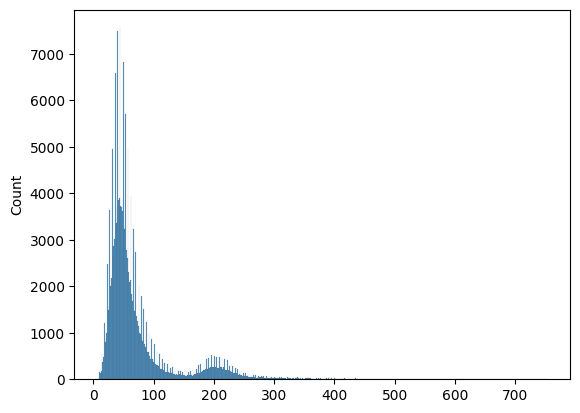

In [32]:
# train corpus 길이 분포 파악
# bert tokenizer max_length 설정 위함
# 대체로 0 ~ 100개 토큰 사이에 분포해 있으므로 128개로 설정
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot([len(i) for i in train_corpus2])
plt.show()

In [34]:
from transformers import BertTokenizer

# BERT Tokenizer를 이용한 text embedding 수행
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 토크나이저를 이용해 텍스트를 토큰화하고 인덱스로 변환
TOKEN_MAX_LENGTH = 128
tokenized_inputs = tokenizer(train_corpus2, padding=True, truncation=True, max_length=TOKEN_MAX_LENGTH, return_tensors="pt")

# 3분 소요
tokenized_inputs['input_ids'].shape

torch.Size([183421, 128])

In [35]:
'''
  - input_ids: 입력 텍스트를 BERT 사전의 고유한 토큰 ID로 변환한 값입니다.
  - token_type_ids: 각 토큰이 문장 A인지, 문장 B인지 구분하기 위한 값입니다. 단일 문장의 경우는 모두 0, 두 문장이 있을 경우는 문장 A는 0, 문장 B는 1로 할당됩니다.
  - attention_mask: 모델이 실제 텍스트와 패딩을 구분할 수 있도록, 실제 텍스트는 1, 패딩된 부분은 0으로 할당된 값입니다.
'''
tokenized_inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [36]:
# train valid split
X_train, X_valid, y_train, y_valid = train_test_split(
    tokenized_inputs['input_ids'], train_labels, test_size=0.2, random_state=42
)

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.long)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.long)

<ipython-input-36-73a6e6257f6f>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.long)
<ipython-input-36-73a6e6257f6f>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_valid_tensor = torch.tensor(X_valid, dtype=torch.long)


In [37]:
X_train_tensor.shape, X_valid_tensor.shape

(torch.Size([146736, 128]), torch.Size([36685, 128]))

In [38]:
y_train_tensor.shape, y_valid_tensor.shape

(torch.Size([146736]), torch.Size([36685]))

# 3. 데이터 구축

In [39]:
# -1, 0, 1 -> 0, 1, 2 레이블로 변환
# -1 레이블이 cross entropy loss에서 error 발생
y_train_tensor = y_train_tensor + 1
y_valid_tensor = y_valid_tensor + 1

In [40]:
# Dataset 정의
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

# DataLoader 생성
train_dataset = TextDataset(X_train_tensor, y_train_tensor)
valid_dataset = TextDataset(X_valid_tensor, y_valid_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64)

In [41]:
train_loader.dataset.texts.shape, valid_loader.dataset.texts.shape

(torch.Size([146736, 128]), torch.Size([36685, 128]))

In [42]:
# 주어진 train, valid 데이터 크기 / batch size
len(train_loader), len(valid_loader)

(2293, 574)

# 4. Sentiment Classifier Model

## 4.1) Vanilla RNN

In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [62]:
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):

        super(SentimentRNN, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # 임베딩 레이어
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)  # 바닐라 RNN 레이어
        self.fc = nn.Linear(hidden_dim, output_dim)  # Fully Connected 레이어

    def forward(self, x):

        embedded = self.embedding(x)  # 텍스트 임베딩
        rnn_out, _ = self.rnn(embedded)  # RNN 처리
        output = rnn_out[:, -1, :]  # 마지막 타임스텝의 은닉 상태를 가져옴
        output = self.fc(output)  # 분류를 위한 출력

        return output

# 하이퍼파라미터 설정
vocab_size = tokenizer.vocab_size
embedding_dim = 100  # 임베딩 차원
hidden_dim = 128     # RNN 은닉 상태 차원
output_dim = 3       # 긍정, 부정, 중립 3개의 클래스

# 모델 초기화
model = SentimentRNN(vocab_size=len(tokenizer), embedding_dim=embedding_dim, hidden_dim=hidden_dim, output_dim=output_dim).to(device)
model

SentimentRNN(
  (embedding): Embedding(30522, 100)
  (rnn): RNN(100, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)

## 4.2) LSTM

# 5. 모델 훈련

In [46]:
!pip install tensorboard

In [47]:
from torch.utils.tensorboard import SummaryWriter

# TensorBoard 설정
writer = SummaryWriter(log_dir="../runs/sentiment_analysis")

In [65]:
import torch.nn as nn
import torch.optim as optim

# 손실 함수와 옵티마이저 정의
pos_weight = 183421 / 119806 # 2.0
neu_weight = 183421 / 37121 # 1.0
neg_weight = 183421 / 26494 # 0.0
class_weights = torch.tensor([neg_weight, neu_weight, pos_weight], dtype=torch.float).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [69]:
# 훈련 함수 정의
def train_model(model, train_loader, criterion, optimizer):

    model.train()

    total_loss = 0
    all_preds = []
    all_labels = []

    for texts, labels in train_loader:

        optimizer.zero_grad() # 1. 기울기 초기화

        # 2. data GPU 이동
        texts = texts.to(device)
        labels = labels.to(device)

        outputs = model(texts) # 3.예측값 산출
        loss = criterion(outputs, labels) # 4. 손실 계산

        loss.backward() # 5. 역전파하여 기울기 계산
        optimizer.step() # 6. 파라미터 업데이트

        # loss 값 별도 저장
        total_loss += loss.item()

        # 예측값 저장
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # 성능 지표 계산
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return total_loss / len(train_loader), acc, prec, recall, f1


# 평가 함수 정의
def evaluate_model(model, valid_loader, criterion):

    model.eval()

    with torch.no_grad():

        total_loss = 0
        all_preds = []
        all_labels = []

        for texts, labels in valid_loader:

            texts = texts.to(device)
            labels = labels.to(device)

            outputs = model(texts)

            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # 예측값 저장
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 성능 지표 계산
    acc = accuracy_score(all_labels, all_preds)
    prec = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    return total_loss / len(valid_loader), acc, prec, recall, f1

In [70]:
# 전체 훈련 및 평가를 수행하는 함수
def train_and_evaluate(model, train_loader, valid_loader, criterion, optimizer, num_epochs, checkpoint_path):

    best_val_loss = float('inf')

    for epoch in range(num_epochs):

        print(f"\n===== Epoch {epoch + 1} =====")

        # 모델 훈련
        train_loss, train_acc, train_prec, train_recall, train_f1 = train_model(model, train_loader, criterion, optimizer)

        # TensorBoard 기록: Train metrics
        writer.add_scalar("Loss/train", train_loss, epoch)
        writer.add_scalar("Accuracy/train", train_acc, epoch)
        writer.add_scalar("Precision/train", train_prec, epoch)
        writer.add_scalar("Recall/train", train_recall, epoch)
        writer.add_scalar("F1/train", train_f1, epoch)

        # 모델 평가
        valid_loss, valid_acc, valid_prec, valid_recall, valid_f1 = evaluate_model(model, valid_loader, criterion)

        # TensorBoard 기록: Train metrics
        writer.add_scalar("Loss/valid", valid_loss, epoch)
        writer.add_scalar("Accuracy/valid", valid_acc, epoch)
        writer.add_scalar("Precision/valid", valid_prec, epoch)
        writer.add_scalar("Recall/valid", valid_recall, epoch)
        writer.add_scalar("F1/valid", valid_f1, epoch)

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Train Prec: {train_prec:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")
        print(f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}, Valid Prec: {valid_prec:.4f}, Valid Recall: {valid_recall:.4f}, Valid F1: {valid_f1:.4f}")

        # # 최적의 valid loss 발생했을 때 모델 저장
        # if valid_loss < best_val_loss:
        #     best_val_loss = valid_loss
        #     torch.save(model.state_dict(), checkpoint_path)  # 최적의 모델 저장

        #     print(f"Epoch {epoch+1}: Model saved with validation loss: {valid_loss:.4f}")

    writer.close()

In [55]:
num_epochs = 50

In [57]:
checkpoint_path = '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/Vanilla_RNN_model.pt'

In [71]:
train_and_evaluate(model, train_loader, valid_loader, criterion, optimizer, num_epochs=num_epochs, checkpoint_path=checkpoint_path)


===== Epoch 1 =====
Train Loss: 1.1037, Train Acc: 0.3579, Train Prec: 0.4998, Train Recall: 0.3579, Train F1: 0.3947
Valid Loss: 1.0985, Valid Acc: 0.2947, Valid Prec: 0.5365, Valid Recall: 0.2947, Valid F1: 0.2642

===== Epoch 2 =====
Train Loss: 1.1028, Train Acc: 0.3596, Train Prec: 0.4976, Train Recall: 0.3596, Train F1: 0.3957
Valid Loss: 1.1029, Valid Acc: 0.2066, Valid Prec: 0.5311, Valid Recall: 0.2066, Valid F1: 0.1107

===== Epoch 3 =====
Train Loss: 1.1024, Train Acc: 0.3500, Train Prec: 0.5010, Train Recall: 0.3500, Train F1: 0.3854
Valid Loss: 1.1000, Valid Acc: 0.2468, Valid Prec: 0.5353, Valid Recall: 0.2468, Valid F1: 0.1914

===== Epoch 4 =====
Train Loss: 1.1029, Train Acc: 0.3473, Train Prec: 0.4996, Train Recall: 0.3473, Train F1: 0.3822
Valid Loss: 1.1035, Valid Acc: 0.2674, Valid Prec: 0.5296, Valid Recall: 0.2674, Valid F1: 0.2175

===== Epoch 5 =====
Train Loss: 1.1024, Train Acc: 0.3629, Train Prec: 0.5030, Train Recall: 0.3629, Train F1: 0.3993
Valid Loss: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Loss: 1.1023, Train Acc: 0.3525, Train Prec: 0.5016, Train Recall: 0.3525, Train F1: 0.3885
Valid Loss: 1.0989, Valid Acc: 0.6257, Valid Prec: 0.4486, Valid Recall: 0.6257, Valid F1: 0.5160

===== Epoch 8 =====
Train Loss: 1.1036, Train Acc: 0.3605, Train Prec: 0.4975, Train Recall: 0.3605, Train F1: 0.3961
Valid Loss: 1.1003, Valid Acc: 0.6482, Valid Prec: 0.4890, Valid Recall: 0.6482, Valid F1: 0.5156

===== Epoch 9 =====
Train Loss: 1.1028, Train Acc: 0.3453, Train Prec: 0.4986, Train Recall: 0.3453, Train F1: 0.3813
Valid Loss: 1.1037, Valid Acc: 0.2948, Valid Prec: 0.5277, Valid Recall: 0.2948, Valid F1: 0.2632

===== Epoch 10 =====
Train Loss: 1.1022, Train Acc: 0.3529, Train Prec: 0.4998, Train Recall: 0.3529, Train F1: 0.3881
Valid Loss: 1.1023, Valid Acc: 0.2897, Valid Prec: 0.5290, Valid Recall: 0.2897, Valid F1: 0.2570

===== Epoch 11 =====
Train Loss: 1.1036, Train Acc: 0.3660, Train Prec: 0.5000, Train Recall: 0.3660, Train F1: 0.4013
Valid Loss: 1.0984, Valid Acc: 0

In [87]:
# %load_ext tensorboard
# %tensorboard --logdir=../runs/sentiment_analysis

In [88]:
# torch.save(model.state_dict(), '/content/drive/MyDrive/MLDL_개인프로젝트/2024/Sentiment_Classification/Vanilla_RNN_model.pt')